In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดไฟล์ CSV 
df = pd.read_csv('spotifydataset.csv') 

In [ ]:
# แสดงชื่อคอลัมน์และตัวอย่างข้อมูล
print(df.columns)
print(df.head())

Index(['Unnamed: 0', 'artist_name', 'genres', 'followers', 'artist_popularity',
       'artist_url', 'track_name', 'album_name', 'release_date', 'duration_ms',
       'explicit', 'track_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo'],
      dtype='object')
   Unnamed: 0    artist_name genres  followers  artist_popularity  \
0           0  Ariana Grande    pop   98934105                 89   
1           1  Ariana Grande    pop   98934105                 85   
2           2  Ariana Grande    pop   98934105                 83   
3           3  Ariana Grande    pop   98934105                 80   
4           4  Ariana Grande    pop   98934105                 79   

                                          artist_url  \
0  https://open.spotify.com/artist/66CXWjxzNUsdJx...   
1  https://open.spotify.com/artist/66CXWjxzNUsdJx...   
2  https://open.spotify.com/artist/66CXWjxzNU

In [4]:
# ลบ column ที่ไม่จำเป็น
df = df.drop(columns=['Unnamed: 0', 'artist_url'])

In [5]:
# แยก genres
df = df.dropna(subset=['genres'])
df['genres'] = df['genres'].apply(lambda m: m.split(', '))
df = df.explode('genres')

In [16]:
# คำนวณ Top 10 ประเภทเพลงยอดนิยมรวม
top_genres = df.groupby('genres')['track_popularity'].sum().nlargest(10)

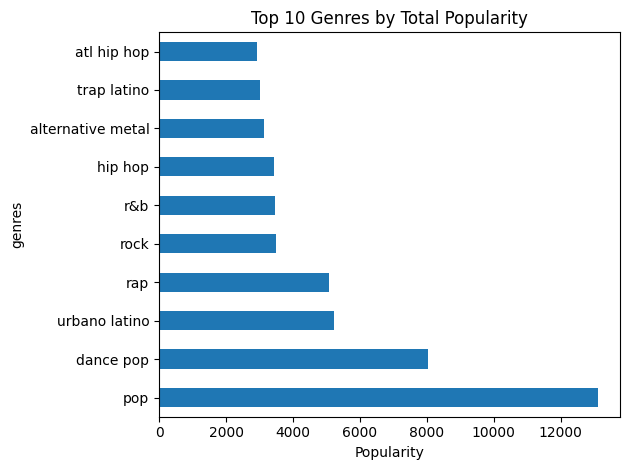

In [7]:
# วาดกราฟ bar
top_genres.plot(kind='barh', title='Top 10 Genres by Total Popularity')
plt.xlabel('Popularity')
plt.tight_layout()
plt.show()


⏱️ Top 5 Genres with Longest Average Duration:
genres
classical era                 331175.7
alternative rock              269419.7
grunge                        269419.7
dirty south rap               269252.9
old school atlanta hip hop    269252.9
Name: duration_ms, dtype: float64


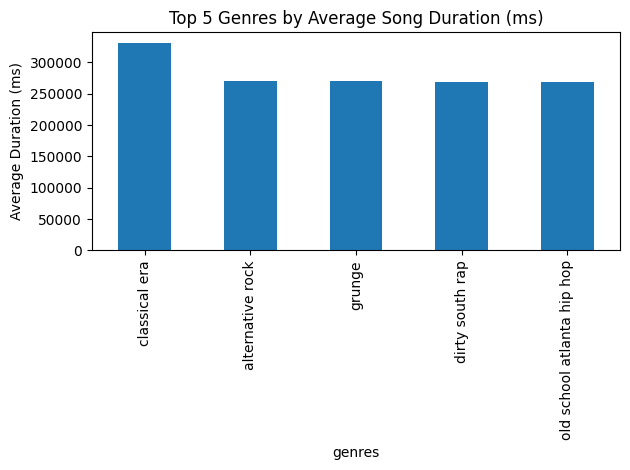

In [14]:
# วิเคราะห์ระยะเวลาเฉลี่ยของเพลงในแต่ละประเภท
genre_duration = df.groupby('genres')['duration_ms'].mean().nlargest(5)
print("\n⏱️ Top 5 Genres with Longest Average Duration:")
print(genre_duration)

# วาดกราฟระยะเวลาเฉลี่ย
genre_duration.plot(kind='bar', title='Top 5 Genres by Average Song Duration (ms)')
plt.ylabel('Average Duration (ms)')
plt.tight_layout()
plt.show()

In [11]:
# หาศิลปินที่มีเพลงยอดนิยมที่สุด
top_artist = df.sort_values('track_popularity', ascending=False).head(10)
print("\n🎧 Top 10 Songs:")
print(top_artist[['track_name', 'artist_name', 'genres', 'track_popularity']])


🎧 Top 10 Songs:
                                  track_name     artist_name           genres  \
30                              Cruel Summer    Taylor Swift              pop   
40                          I Wanna Be Yours  Arctic Monkeys   permanent wave   
40                          I Wanna Be Yours  Arctic Monkeys      garage rock   
40                          I Wanna Be Yours  Arctic Monkeys      modern rock   
40                          I Wanna Be Yours  Arctic Monkeys  sheffield indie   
40                          I Wanna Be Yours  Arctic Monkeys             rock   
0   we can't be friends (wait for your love)   Ariana Grande              pop   
31             Fortnight (feat. Post Malone)    Taylor Swift              pop   
33                                    august    Taylor Swift              pop   
32           I Can Do It With a Broken Heart    Taylor Swift              pop   

    track_popularity  
30                92  
40                91  
40                91  